In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./data/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

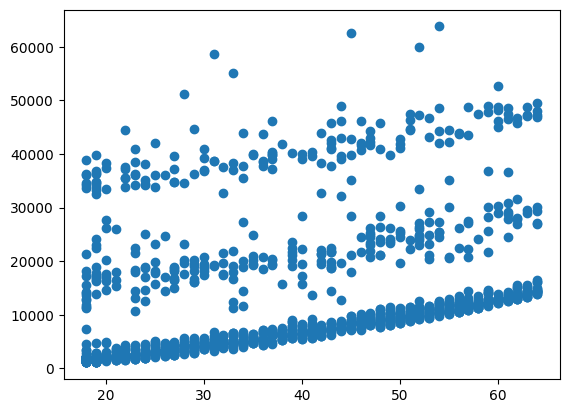

In [12]:
plt.scatter(df['age'], df['charges'])

## Check if Polynomial Regression is Suitable

Let's analyze the relationship and compare linear vs polynomial regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data (using age as predictor)
X = df[['age']]
y = df['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Test different polynomial degrees
results = {}

for degree in range(1, 6):  # Test degrees 1 through 5
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    results[degree] = {
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    }
    
    print(f"Degree {degree}:")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print()

Degree 1:
  Train R²: 0.0794, Test R²: 0.1241
  Train RMSE: 11527.29, Test RMSE: 11661.22

Degree 2:
  Train R²: 0.0820, Test R²: 0.1187
  Train RMSE: 11510.78, Test RMSE: 11696.79

Degree 3:
  Train R²: 0.0825, Test R²: 0.1185
  Train RMSE: 11507.63, Test RMSE: 11698.09

Degree 4:
  Train R²: 0.0825, Test R²: 0.1192
  Train RMSE: 11507.48, Test RMSE: 11693.71

Degree 5:
  Train R²: 0.0841, Test R²: 0.1187
  Train RMSE: 11497.70, Test RMSE: 11696.91



c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


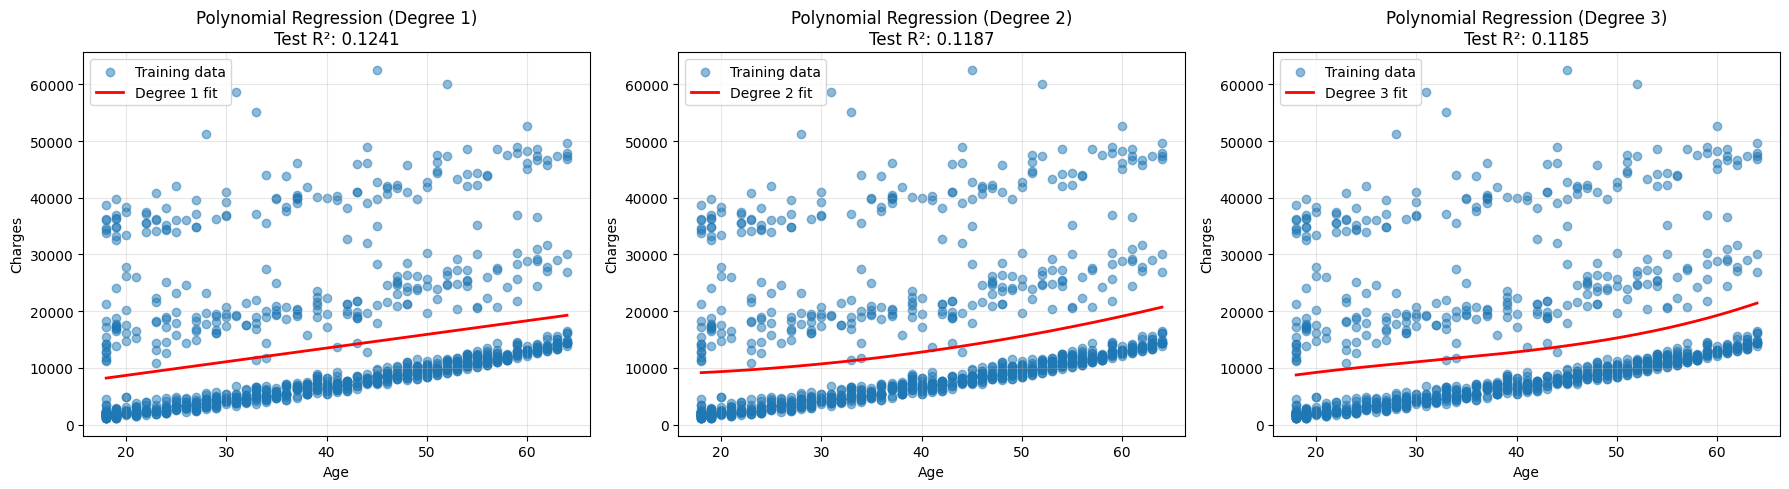

In [15]:
# Visualize Linear vs Polynomial (degree 2 and 3) fits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sort for smooth line plotting
X_range = np.linspace(X['age'].min(), X['age'].max(), 300).reshape(-1, 1)

for idx, degree in enumerate([1, 2, 3]):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_range_poly = poly.transform(X_range)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_range_pred = model.predict(X_range_poly)
    
    axes[idx].scatter(X_train, y_train, alpha=0.5, label='Training data')
    axes[idx].plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Degree {degree} fit')
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Charges')
    axes[idx].set_title(f'Polynomial Regression (Degree {degree})\nTest R²: {results[degree]["Test R²"]:.4f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Analysis Summary

**Polynomial Regression is NOT significantly better for this dataset (age vs charges):**

1. **Very Low R² scores** (~0.08-0.12): Only 8-12% of variance in charges is explained by age alone
2. **Minimal improvement**: Polynomial degrees 2-5 show virtually no improvement over linear (degree 1)
3. **Pattern in data**: The scatter plot shows three distinct clusters (likely related to other factors like smoking status)

**Recommendations:**
- Age alone is a poor predictor of insurance charges
- Consider using multiple features (age, bmi, smoker, children, etc.)
- The data suggests interaction effects (e.g., age × smoker) would be more valuable than polynomial terms
- Try multiple linear regression or more advanced models with all features